<a href="https://colab.research.google.com/github/ArminD93/WorldHappinessReport/blob/dev/WorldHappinessReport_podsumowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2015 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2015.csv', low_memory=False)
happiness2016 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)
happiness2017 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2017.csv', low_memory=False)
happiness2018 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2018.csv', low_memory=False)
happiness2019 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2019.csv', low_memory=False)


DistributionObj2015 = Distribution(happiness2015)
CorrelationObj2015 = Correlation(dataset=happiness2015)

DistributionObj2016 = Distribution(happiness2016)
CorrelationObj2016 = Correlation(dataset=happiness2016)

DistributionObj2017 = Distribution(happiness2017)
CorrelationObj2017 = Correlation(dataset=happiness2017)

DistributionObj2018 = Distribution(happiness2018)
CorrelationObj2018 = Correlation(dataset=happiness2018)

DistributionObj2019 = Distribution(happiness2019)
CorrelationObj2019 = Correlation(dataset=happiness2019)

print(' '*80,'World Happiness report 2015')
print('-'*250)
print(happiness2015.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2016')
print('-'*250)
print(happiness2016.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2017')
print('-'*250)
print(happiness2017.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2018')
print('-'*250)
print(happiness2018.head(3).to_string())
print('='*250)
print()
print()
print(' '*80,'World Happiness report 2019')
print('-'*250)
print(happiness2019.head(3).to_string())
print('='*250)

/content/drive/My Drive/ColabNotebooks/WorldHappiness
                                                                                 World Happiness report 2015
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       Country          Region  Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual
0  Switzerland  Western Europe               1            7.587         0.03411                   1.39651  1.34951                   0.94143  0.66557                        0.41978     0.29678            2.51738
1      Iceland  Western Europe               2            7.561         0.04884                   1.30232  1.40223                   0.94784  0.62877             

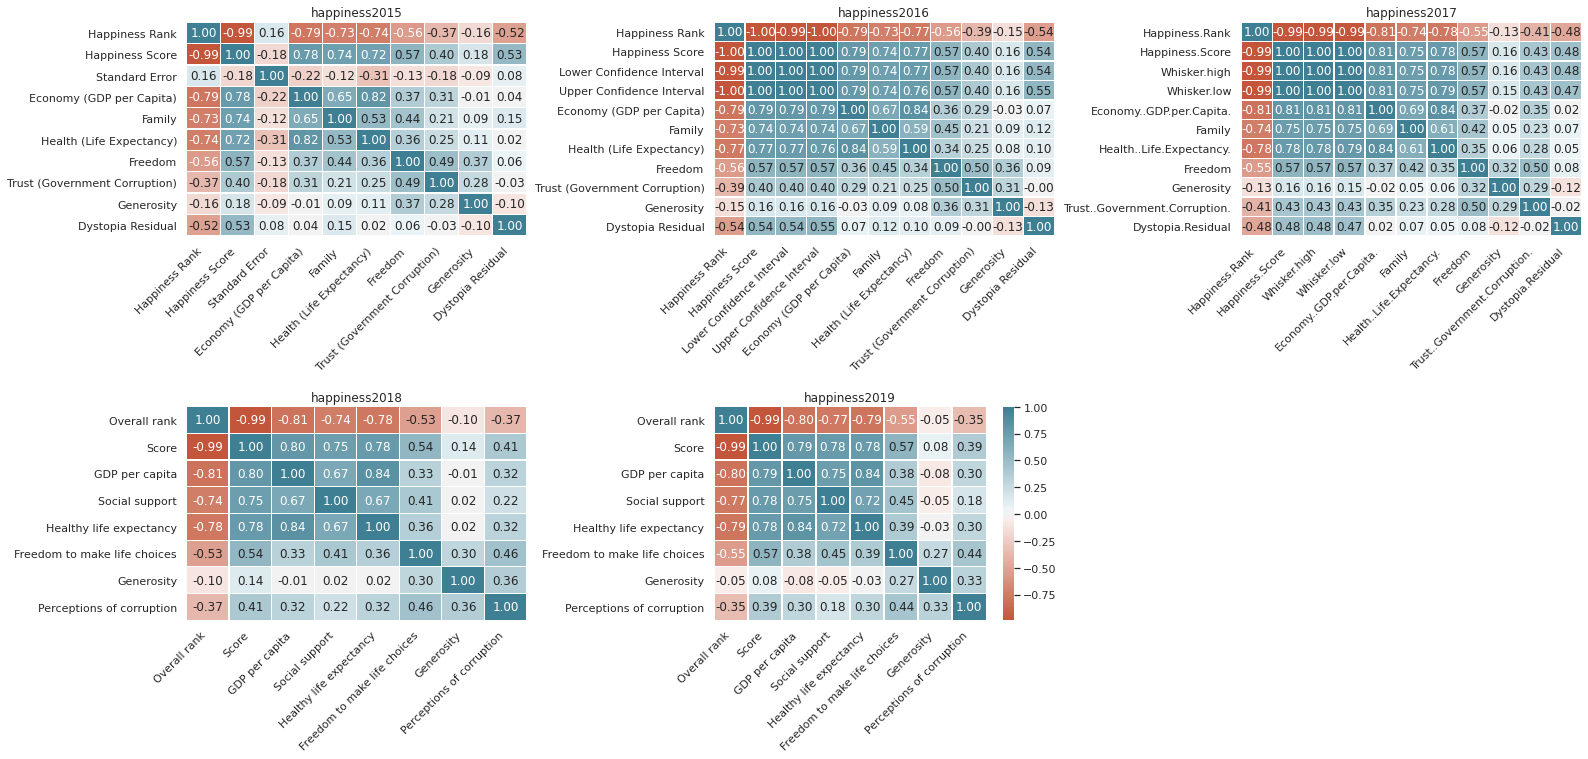

In [2]:
reports_dict = {'happiness2015' : happiness2015,
                'happiness2016' : happiness2016,
                'happiness2017' : happiness2017,
                'happiness2018' : happiness2018,
                'happiness2019' : happiness2019}

reportNo = 0
cols = 3
rows = 2
set_cbar = False

fig = plt.figure(figsize=(25,11))
fig.subplots_adjust(hspace=0.8, wspace=0.55)

for i in range(1, 6):
      fig.add_subplot(rows, cols, i) 
      report      = [ val for val in reports_dict.values() ][reportNo]
      report_name = [ key for key in reports_dict.keys()   ][reportNo]

      corr= report.corr()
           
      if i == 5:
        set_cbar=True

      g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cbar=set_cbar, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
      g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
      g.set( title= report_name)
      reportNo += 1


plt.show()